In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
data = sns.load_dataset("iris")

In [3]:
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Variable distribution


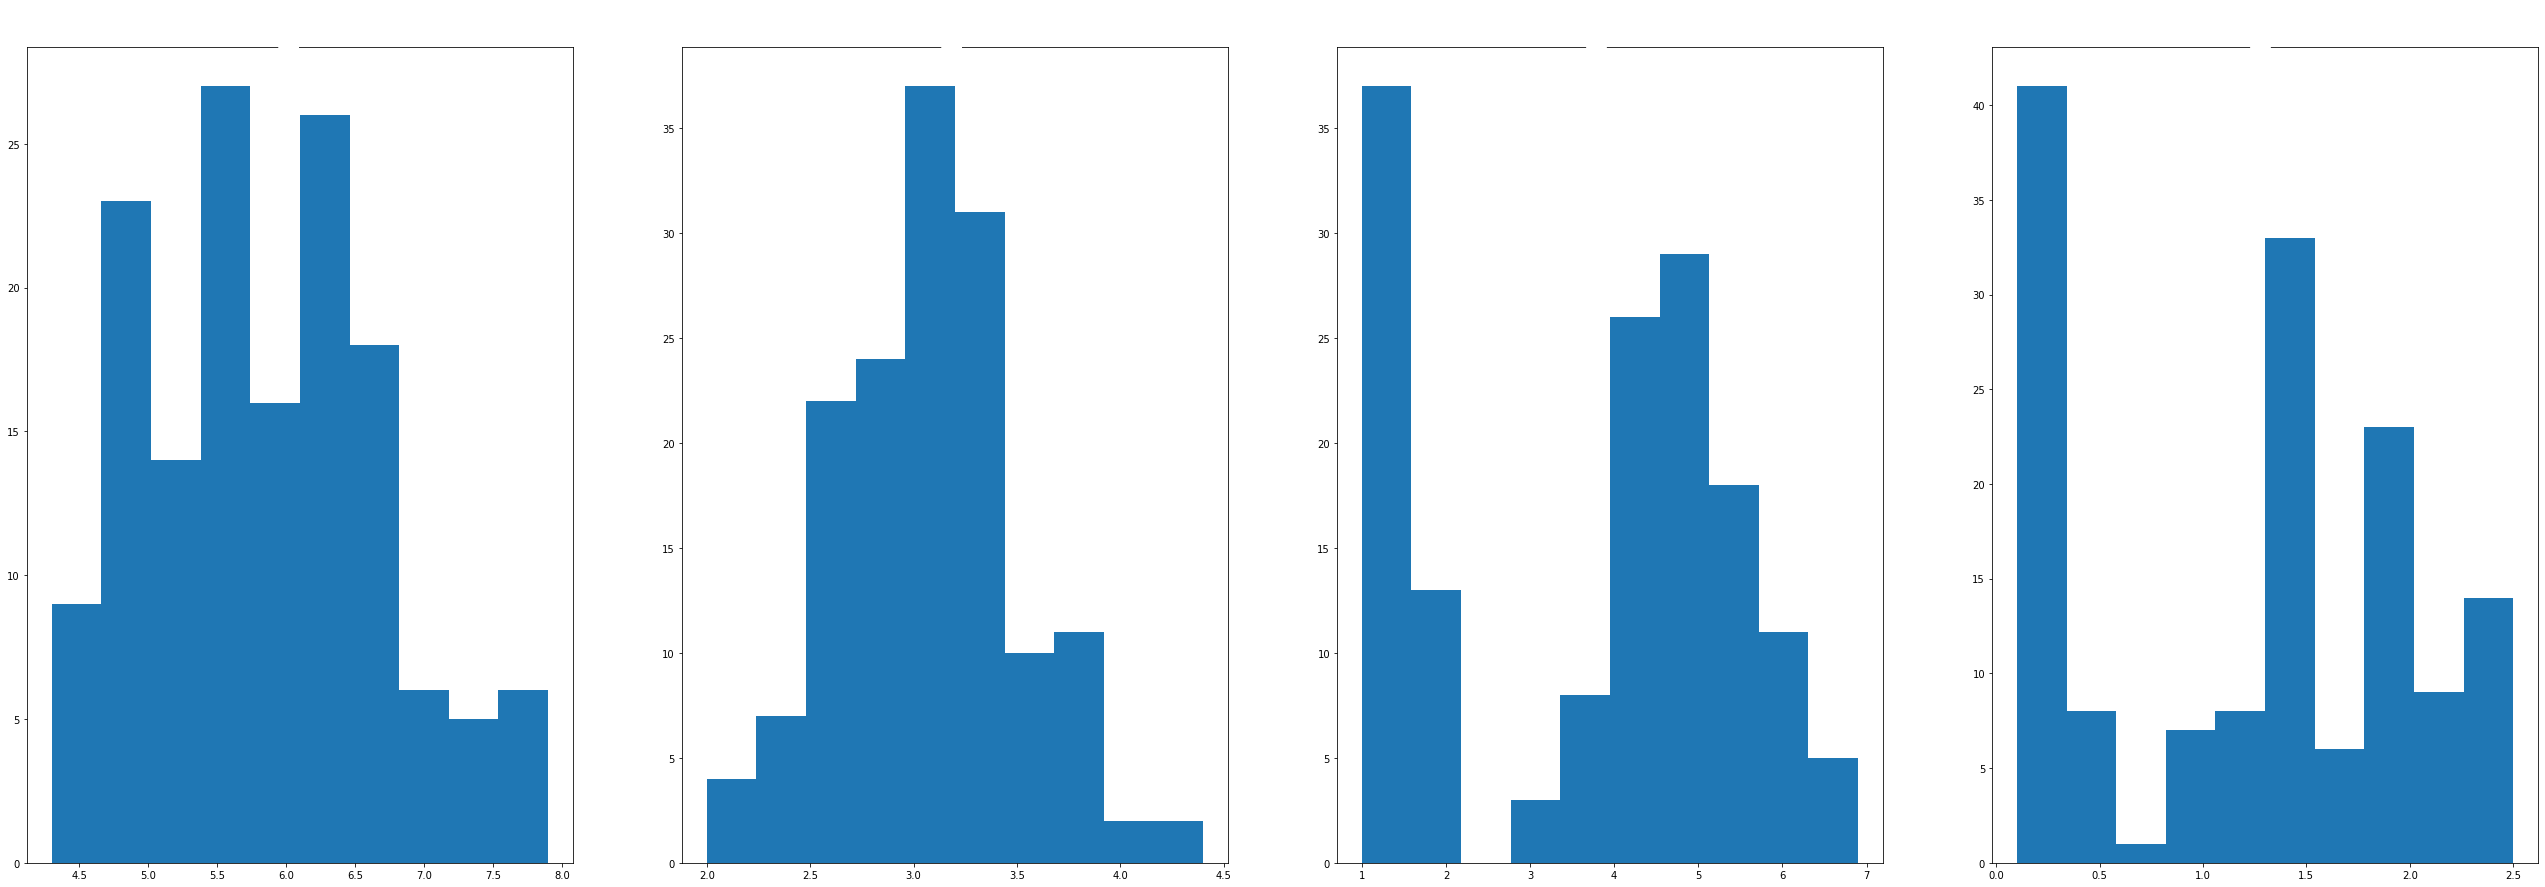

In [42]:
val = data.columns.to_list()

plt.figure(figsize=(45,15))
for i in range(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(data.iloc[:,i])
    plt.title("{}".format(val[i]),fontsize=40,color="white")
print("Variable distribution")

In [48]:
null_value = data.isnull().sum().to_frame(name="Null Value")
null_value

,Null Value
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [4]:
def encode(x):
    if "setosa" in x:
        return 0
    elif "versicolor" in x:
        return 1
    else:
        return 2

In [23]:
species_encoded = data.species.apply(lambda x : encode(x)).to_frame(name="species_encoded")
process = pd.concat([data,species_encoded],axis=1)
processed_data = process.drop(columns=["species"])
display(processed_data)

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
X = processed_data.iloc[:,:-1]
y = processed_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [40]:
linear = LinearRegression()
linear.fit(X_train,y_train)
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

linear_preds = linear.predict(X_test)
RFC_preds = RFC.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
mse = mean_squared_error(y_test,linear_preds)
accuracy = accuracy_score(y_test,RFC_preds)
f1 = f1_score(y_test,RFC_preds,average="macro")

print("mean_squared_error of LinearRegression: {}\n".format(mse),
     "accuracy of RandomForest : {}\n".format(accuracy),
     "f1_score of RandomForest : {}".format(f1))

mean_squared_error of LinearRegression: 0.03611030626905012
 accuracy of RandomForest : 1.0
 f1_score of RandomForest : 1.0
